In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
df_rating = pd.read_csv('/content/sample_data/Books/Ratings.csv')
df_books = pd.read_csv('/content/sample_data/Books/Books.csv')
df_users = pd.read_csv('/content/sample_data/Books/Users.csv')
df_books.head()
# df_rating.head()
# df_users.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
df_images = df_books.iloc[:, -2:]
df_books = df_books.iloc[:, :-2]
# df_images.head()
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [17]:
userCounts = df_rating['User-ID'].value_counts()
isbnCounts = df_rating['ISBN'].value_counts()
print(isbnCounts)

0971880107    1628
0316666343     859
0385504209     598
0312195516     483
0060928336     479
              ... 
0752600667       1
0752600904       1
0752839780       1
0752839802       1
34               1
Name: ISBN, Length: 262745, dtype: int64


In [18]:
df_rating['User-ID'].unique()

array([276725, 276726, 276727, ..., 182085, 182086, 182088])

In [ ]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
dtype: int64

In [ ]:
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [19]:
dfr = df_rating
dfr = dfr[~dfr['ISBN'].isin(isbnCounts[isbnCounts < 100].index)]

dfr = pd.merge(right=dfr, left = df_books, on="ISBN")
dfr.head()
dfr = dfr[~dfr['User-ID'].isin(userCounts[userCounts < 200].index)]
dfr = dfr.drop_duplicates(["Book-Title", "User-ID"])

In [20]:
combine_book_rating = dfr
columns = ['Year-Of-Publication', 'Book-Author', 'Image-URL-S', 'Publisher']
combine_book_rating =  combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0.0
5,0440234743,The Testament,2977,0.0
7,0440234743,The Testament,3363,0.0
10,0440234743,The Testament,7346,9.0
14,0440234743,The Testament,9856,0.0


In [21]:
df_for_knn = combine_book_rating
combine_book_rating.shape[0]

20714

In [22]:
# group by book titles and create a new column for total rating count
combine_book_rating = combine_book_rating.dropna(axis=0, subset = ['Book-Title'])
book_ratingCount = (combine_book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns={'Book-Rating': 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,1984,34
1,1st to Die: A Novel,80
2,2nd Chance,45
3,A Bend in the Road,52
4,A Case of Need,35


In [23]:
combine_book_rating.shape[0]

20714

In [24]:
print(combine_book_rating.columns)
print(book_ratingCount.columns)

Index(['ISBN', 'Book-Title', 'User-ID', 'Book-Rating'], dtype='object')
Index(['Book-Title', 'totalRatingCount'], dtype='object')


In [25]:
# df = combine_book_rating;
# df = pd.DataFrame(combine_book_rating[combine_book_rating.duplicated('Book-Title', keep='first')])
# df = df.drop_duplicates()
# df.head()

df = pd.DataFrame(combine_book_rating)
combine_book_rating = df.drop_duplicates(subset=['Book-Title'])
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0.0
275,0452264464,Beloved (Plume Contemporary Fiction),278418,0.0
403,0971880107,Wild Animus,277427,0.0
2030,0345402871,Airframe,11676,0.0
2157,0345417623,Timeline,3363,0.0


In [26]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title')
rating_with_totalRatingCount.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
0,0440234743,The Testament,277478,0.0,72
1,0452264464,Beloved (Plume Contemporary Fiction),278418,0.0,38
2,0971880107,Wild Animus,277427,0.0,238
3,0345402871,Airframe,11676,0.0,33
4,0345417623,Timeline,3363,0.0,62


In [27]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90     92.80
0.91     95.86
0.92    102.32
0.93    104.00
0.94    107.24
0.95    111.70
0.96    118.00
0.97    121.86
0.98    135.32
0.99    143.16
Name: totalRatingCount, dtype: float64


In [29]:
popularity_threshold = 143
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book = rating_popular_book.sort_values(by='totalRatingCount', ascending=False)
rating_popular_book.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
2,0971880107,Wild Animus,277427,0.0,238
48,0316666343,The Lovely Bones: A Novel,277427,0.0,178
60,0312278586,The Nanny Diaries: A Novel,3363,0.0,150
171,0440214041,The Pelican Brief,277639,9.0,145


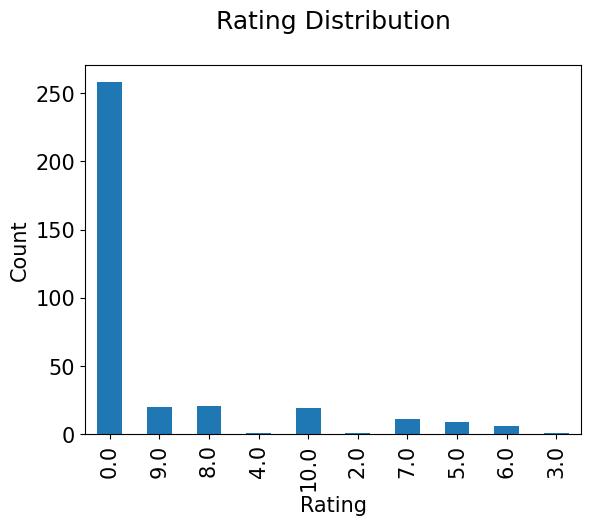

In [30]:
plt.rc('font', size=15)
combine_book_rating['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [31]:
df_for_knn.shape[0]

20714

In [32]:
df_ready = df_for_knn.pivot_table(index=['User-ID'],columns=['ISBN'],values='Book-Rating').fillna(0).T
df_ready.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,180917,180957,181176,181687,182085,182086,277427,277478,277639,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060175400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060391626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060392452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_ready.index = df_ready.join(df_books.set_index('ISBN'))['Book-Title']
df_ready.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,180917,180957,181176,181687,182085,182086,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Poisonwood Bible,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I Know This Much Is True (Oprah's Book Club),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stupid White Men ...and Other Sorry Excuses for the State of the Nation!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
from sklearn.model_selection import train_test_split

In [43]:
# Actual Implementation
model = NearestNeighbors(metric='cosine')
model.fit(df_ready.values)

NearestNeighbors(metric='cosine')

In [44]:
title = 'The Queen of the Damned (Vampire Chronicles (Paperback))'
df_ready.loc[title].shape

(576,)

In [45]:
distance, indice = model.kneighbors([df_ready.loc[title].values], n_neighbors=6)

print(distance)
print(indice)

[[1.11022302e-16 6.03991460e-01 6.33996702e-01 6.57386839e-01
  6.68819789e-01 7.69427651e-01]]
[[ 82  73  89  90  74 300]]


In [46]:
df_ready.iloc[indice[0]].index.values

array(['The Queen of the Damned (Vampire Chronicles (Paperback))',
       'The Vampire Lestat (Vampire Chronicles, Book II)',
       'The Witching Hour (Lives of the Mayfair Witches)',
       'The Tale of the Body Thief (Vampire Chronicles (Paperback))',
       'Interview with the Vampire', 'Bag of Bones'], dtype=object)

In [47]:
pd.DataFrame({
    'Book-Title'   : df_ready.iloc[indice[0]].index.values,
    'Distance': distance[0]
}) \
.sort_values(by='Distance', ascending=True)

,Book-Title,Distance
0,The Queen of the Damned (Vampire Chronicles (P...,1.110223e-16
1,"The Vampire Lestat (Vampire Chronicles, Book II)",6.039915e-01
2,The Witching Hour (Lives of the Mayfair Witches),6.339967e-01
3,The Tale of the Body Thief (Vampire Chronicles...,6.573868e-01
4,Interview with the Vampire,6.688198e-01
5,Bag of Bones,7.694277e-01


In [50]:
def get_recommends(title = ""):
  try:
    book = df_ready.loc[title]
  except KeyError as e:
    print('The given book', e, 'does not exist')
    return

  distance, indice = model.kneighbors([book.values], n_neighbors=6)

  df_recommended_books = pd.DataFrame({
      'Book-Title'   : df_ready.iloc[indice[0]].index.values,
      'Distance': distance[0]
    }) \
    .sort_values(by='Distance', ascending=False) \
    .head(5).values

  return [title, df_recommended_books]

In [57]:
predictions = get_recommends("Interview with the Vampire")
predictions

['Interview with the Vampire',
 array([['The Alchemist: A Fable About Following Your Dream',
         0.7089724350043342],
        ['The Witching Hour (Lives of the Mayfair Witches)',
         0.6804547749834613],
        ['The Queen of the Damned (Vampire Chronicles (Paperback))',
         0.6688197889344305],
        ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
         0.6278379862676545],
        ['The Vampire Lestat (Vampire Chronicles, Book II)',
         0.5904284558816835]], dtype=object)]

In [58]:
book_names = [book[0] for book in predictions[1]]
print(book_names)

['The Alchemist: A Fable About Following Your Dream', 'The Witching Hour (Lives of the Mayfair Witches)', 'The Queen of the Damned (Vampire Chronicles (Paperback))', 'The Tale of the Body Thief (Vampire Chronicles (Paperback))', 'The Vampire Lestat (Vampire Chronicles, Book II)']


In [64]:
true_predictions = ['The Vampire Lestat (Vampire Chronicles, Book II)','The Queen of the Damned (Vampire Chronicles (Paperback))','The vampire Armand','The Tale of the Body Thief (Vampire Chronicles (Paperback))','Prince Lestat (Vampire Chronicles (Paperback))']
precision = precision_score(true_predictions, book_names, average='micro')
recall = recall_score(true_predictions, book_names, average='micro')
f1 = f1_score(true_predictions, book_names, average='micro')

In [65]:
print(precision)
print(recall)
print(f1)

0.2
0.2
0.20000000000000004
